In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [58]:
path = 'https://raw.githubusercontent.com/ovibaridar/Data_sets/main/Male%20and%20female%20Voice%20data%20creat%20by%20al%20arman%20ovi%20.csv'

In [59]:
data = pd.read_csv(path)

In [60]:
data.head(3)

,mean_freq,sd_freq,median_freq,q25_freq,q75_freq,iqr_freq,skewness,kurtosis_val,spectral_flatness,tempogram,...,peak_freq,mean_fun,min_fun,max_fun,mean_dom,min_dom,max_dom,fund_freq,mod_index,label
0,0.101925,1258.484673,1.101064,0.911917,2.156636,0.001245,616.124085,-0.001148,0.004659,0.000133,...,166.0,0.000019,5.290000e-13,0.000064,0.132647,-0.0,1.0,205.312043,15.314357,male
1,0.141755,1087.412699,2.279823,1.597941,3.019070,0.001421,303.676155,-0.000125,0.000518,0.000146,...,153.0,0.000054,2.821115e-06,0.000133,0.146389,-0.0,1.0,239.989176,29.892067,male
2,0.086956,772.431710,0.833124,0.655712,1.613551,0.000958,517.743718,-0.000878,0.000444,0.000160,...,124.0,0.000011,3.726945e-07,0.000037,0.160206,-0.0,1.0,172.931651,10.603064,male


In [61]:
data['label'] = data['label'].replace(['male', 'female'],[0,1])
data['label'].value_counts()

label
0    3682
1    2311
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

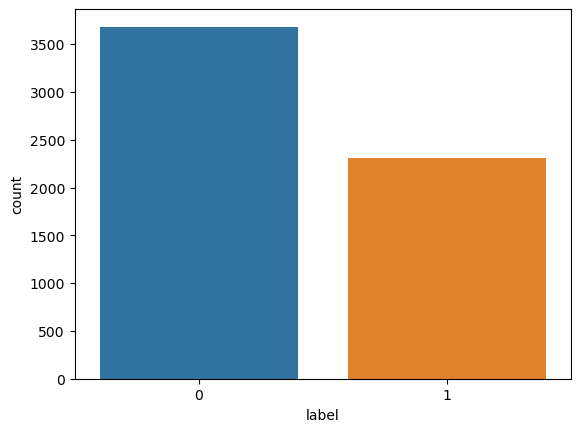

In [62]:
sn.countplot(data,x='label')

In [63]:
data.isnull().sum()

mean_freq            0
sd_freq              0
median_freq          0
q25_freq             0
q75_freq             0
iqr_freq             0
skewness             0
kurtosis_val         0
spectral_flatness    0
tempogram            0
mode_freq            0
centroid_freq        0
peak_freq            0
mean_fun             0
min_fun              0
max_fun              0
mean_dom             0
min_dom              0
max_dom              0
fund_freq            0
mod_index            0
label                0
dtype: int64

In [64]:
data.duplicated().sum()

0

In [65]:
from imblearn.over_sampling import RandomOverSampler
random = RandomOverSampler()

In [66]:
x = data.drop('label', axis=1)
y = data[['label']]

In [67]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [68]:
x.shape

(5993, 21)

In [69]:
y.shape

(5993, 1)

In [70]:
x = mms.fit_transform(x)
x

array([[0.03004972, 0.76523523, 0.27111919, ..., 0.        , 0.17992479,
        0.05880798],
       [0.0417925 , 0.65040209, 0.6521379 , ..., 0.        , 0.22760187,
        0.1204927 ],
       [0.02563651, 0.4389691 , 0.18451089, ..., 0.        , 0.13540547,
        0.03887243],
       ...,
       [0.15223282, 0.55023145, 0.32330813, ..., 0.        , 0.36309954,
        0.05010045],
       [0.15957926, 0.26605169, 0.45490207, ..., 0.        , 0.47369032,
        0.07614756],
       [0.01442297, 0.35125301, 0.37330082, ..., 0.        , 0.12168523,
        0.03127653]])

In [71]:
x ,y = random.fit_resample(x,y)

In [72]:
y.value_counts()

label
0        3682
1        3682
Name: count, dtype: int64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,random_state=42 , test_size=.30)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report ,confusion_matrix
lr = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier()

In [76]:
lr.fit(xtrain , ytrain)

LogisticRegression()

In [77]:
lr.score(xtrain , ytrain)

0.7603802871556073

In [78]:
lr.score(xtest , ytest)

0.7601809954751131

In [79]:
cm = confusion_matrix(ytest , lr.predict(xtest))
cm

array([[863, 255],
       [275, 817]], dtype=int64)

<Axes: >

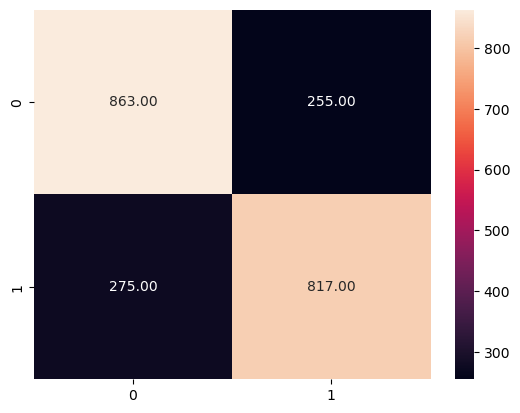

In [80]:
sn.heatmap(cm,annot = True , fmt=".2f")

In [81]:
print(classification_report(ytest,lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      1118
           1       0.76      0.75      0.76      1092

    accuracy                           0.76      2210
   macro avg       0.76      0.76      0.76      2210
weighted avg       0.76      0.76      0.76      2210



In [82]:
dtc.fit(xtrain , ytrain)

DecisionTreeClassifier()

In [83]:
dtc.score(xtrain , ytrain)

1.0

In [84]:
dtc.score(xtest , ytest)

0.7963800904977375

In [85]:
print(classification_report(ytest,dtc.predict(xtest)))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1118
           1       0.78      0.83      0.80      1092

    accuracy                           0.80      2210
   macro avg       0.80      0.80      0.80      2210
weighted avg       0.80      0.80      0.80      2210



In [86]:
cm2 = confusion_matrix(ytest , dtc.predict(xtest))
cm2

array([[858, 260],
       [190, 902]], dtype=int64)

<Axes: >

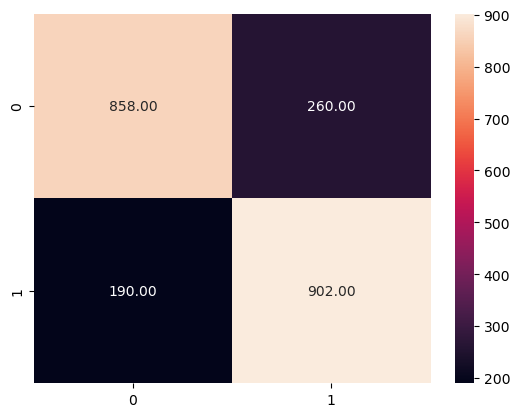

In [87]:
sn.heatmap(cm2,annot = True , fmt=".2f")